In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Flatten
# sequence data packages
from keras.preprocessing import sequence
import itertools
import random
import dataUtils as du

C:\Users\Yang\.conda\envs\test_speedcom\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
df=du.DataUtils.readData('temp_cleaned_data.tsv')
x_str, y_wl=du.DataUtils.get_xy(df,x_col_index=2,y_col_index=3)
maxlen = du.DataUtils.get_max_len(x_str)


   #      Name      name_smiles  Wavelength  Epsilon  Quantum Yield
0  1   Benzene      C1=CC=CC=C1      254.75      210          0.053
1  2   Toluene     CC1=CC=CC=C1      261.75     2860          0.170
2  3  o-Xylene    CC1=CC=CC=C1C      263.00      254          0.170
3  4  m-Xylene  CC1=CC(=CC=C1)C      265.00      284          0.130
4  5  p-Xylene  CC1=CC=C(C=C1)C      275.00      770          0.220


In [3]:
wordmap=du.DataUtils.get_wordmap(x_str)

In [4]:
len(wordmap)

45

In [5]:
x_encode=du.DataUtils.numeric_encoding(x_str,uniform_length=maxlen+5,word_map=wordmap)

In [6]:
maxlen

274

In [7]:
X_train, X_test, y_train, y_test=du.DataUtils.splitData(x_encode, y_wl, ratio=0.2)

In [8]:
len(X_train[0])

279

(array([91., 57., 18., 25., 21., 23., 18.,  7.,  3.,  4.]),
 array([203. , 264.5, 326. , 387.5, 449. , 510.5, 572. , 633.5, 695. ,
        756.5, 818. ]),
 <a list of 10 Patch objects>)

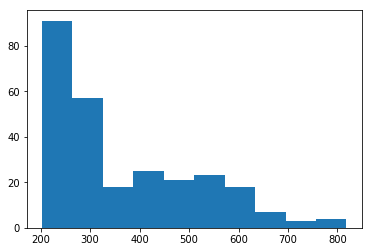

In [9]:
plt.hist(y_wl.tolist())

#### 1st model, use all data and numeric encoding of smiles, added embedding layer

In [10]:
hidden_size = 50
model = Sequential()
model.add(Embedding(len(wordmap), hidden_size, input_length=maxlen+5))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(hidden_size, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_error'])
model.summary() ##use mean_squared_error loss

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 279, 50)           2250      
_________________________________________________________________
lstm_1 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 279, 50)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 279, 50)           2550      
_________________________________________________________________
flatten_1 (Flatten)          (None, 13950)             0         
__________

In [12]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Instructions for updating:
Use tf.cast instead.
Train on 213 samples, validate on 54 samples
Epoch 1/100
213/213 [==============================] - 5s 22ms/step - loss: 159913.8190 - mean_absolute_error: 370.6695 - val_loss: 132619.5133 - val_mean_absolute_error: 341.6674
Epoch 2/100
213/213 [==============================] - 3s 12ms/step - loss: 139917.4018 - mean_absolute_error: 342.6092 - val_loss: 84819.9025 - val_mean_absolute_error: 262.1810
Epoch 3/100
213/213 [==============================] - 2s 12ms/step - loss: 72834.4789 - mean_absolute_error: 216.7726 - val_loss: 24345.9636 - val_mean_absolute_error: 103.5260
Epoch 4/100
213/213 [==============================] - 2s 11ms/step - loss: 26574.2629 - mean_absolute_error: 132.6302 - val_loss: 27603.9005 - val_mean_absolute_error: 149.5782
Epoch 5/100
213/213 [==============================] - 2s 11ms/step - loss: 30105.5847 - mean_absolute_error: 154.6489 - val_loss: 16838.5348 - val_mean_absolute_error: 117.8629
Epoch 6/100
21

213/213 [==============================] - 3s 16ms/step - loss: 20635.9826 - mean_absolute_error: 124.9951 - val_loss: 15769.9952 - val_mean_absolute_error: 108.0824
Epoch 46/100
213/213 [==============================] - 3s 14ms/step - loss: 20059.9324 - mean_absolute_error: 120.4861 - val_loss: 15636.2475 - val_mean_absolute_error: 109.0005
Epoch 47/100
213/213 [==============================] - 3s 12ms/step - loss: 20046.8756 - mean_absolute_error: 118.5087 - val_loss: 15468.3699 - val_mean_absolute_error: 107.2216
Epoch 48/100
213/213 [==============================] - 3s 14ms/step - loss: 18704.1245 - mean_absolute_error: 116.4470 - val_loss: 15403.2869 - val_mean_absolute_error: 105.7927
Epoch 49/100
213/213 [==============================] - 3s 12ms/step - loss: 43911.1757 - mean_absolute_error: 171.2723 - val_loss: 37841.8141 - val_mean_absolute_error: 173.2914
Epoch 50/100
213/213 [==============================] - 3s 12ms/step - loss: 27582.9016 - mean_absolute_error: 147.158

213/213 [==============================] - 3s 13ms/step - loss: 7692.0606 - mean_absolute_error: 62.9609 - val_loss: 7740.1339 - val_mean_absolute_error: 67.4845
Epoch 92/100
213/213 [==============================] - 3s 13ms/step - loss: 7737.9626 - mean_absolute_error: 65.0541 - val_loss: 7822.4623 - val_mean_absolute_error: 66.4573
Epoch 93/100
213/213 [==============================] - 3s 13ms/step - loss: 8504.2838 - mean_absolute_error: 66.0765 - val_loss: 8382.7890 - val_mean_absolute_error: 67.4699
Epoch 94/100
213/213 [==============================] - 3s 14ms/step - loss: 8071.7393 - mean_absolute_error: 67.0537 - val_loss: 9222.6198 - val_mean_absolute_error: 71.4740
Epoch 95/100
213/213 [==============================] - 3s 14ms/step - loss: 8221.5595 - mean_absolute_error: 65.2346 - val_loss: 8256.0799 - val_mean_absolute_error: 67.3739
Epoch 96/100
213/213 [==============================] - 3s 12ms/step - loss: 7775.9458 - mean_absolute_error: 64.4309 - val_loss: 9084.682

In [13]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=50)

Train on 213 samples, validate on 54 samples
Epoch 1/50
213/213 [==============================] - 2s 11ms/step - loss: 7408.5909 - mean_absolute_error: 64.3249 - val_loss: 8630.6930 - val_mean_absolute_error: 69.0457
Epoch 2/50
213/213 [==============================] - 3s 12ms/step - loss: 7701.7948 - mean_absolute_error: 64.1851 - val_loss: 8640.1936 - val_mean_absolute_error: 70.0513
Epoch 3/50
213/213 [==============================] - 3s 12ms/step - loss: 7874.4656 - mean_absolute_error: 64.2177 - val_loss: 8646.6776 - val_mean_absolute_error: 69.1646
Epoch 4/50
213/213 [==============================] - 3s 12ms/step - loss: 7853.2146 - mean_absolute_error: 64.6273 - val_loss: 9063.6929 - val_mean_absolute_error: 71.6374
Epoch 5/50
213/213 [==============================] - 2s 12ms/step - loss: 8026.5921 - mean_absolute_error: 66.2241 - val_loss: 8238.5576 - val_mean_absolute_error: 68.1226
Epoch 6/50
213/213 [==============================] - 3s 12ms/step - loss: 7547.3592 - mea

Epoch 48/50
213/213 [==============================] - 3s 12ms/step - loss: 6537.7709 - mean_absolute_error: 57.5768 - val_loss: 8562.4051 - val_mean_absolute_error: 65.9077
Epoch 49/50
213/213 [==============================] - 2s 12ms/step - loss: 6194.4021 - mean_absolute_error: 56.9609 - val_loss: 8698.7138 - val_mean_absolute_error: 68.0695
Epoch 50/50
213/213 [==============================] - 3s 13ms/step - loss: 6111.4901 - mean_absolute_error: 56.9381 - val_loss: 8734.0980 - val_mean_absolute_error: 66.4675


In [ ]:
from sksklearnmetr

In [30]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=50)

Train on 213 samples, validate on 54 samples
Epoch 1/50
213/213 [==============================] - 7s 33ms/step - loss: 8599.2683 - mean_absolute_error: 65.4121 - val_loss: 6576.7255 - val_mean_absolute_error: 56.6634
Epoch 2/50
213/213 [==============================] - 7s 31ms/step - loss: 8437.3748 - mean_absolute_error: 62.9597 - val_loss: 6396.6972 - val_mean_absolute_error: 56.1844
Epoch 3/50
213/213 [==============================] - 6s 30ms/step - loss: 8389.5981 - mean_absolute_error: 64.1356 - val_loss: 7717.3032 - val_mean_absolute_error: 67.7722
Epoch 4/50
213/213 [==============================] - 6s 30ms/step - loss: 8152.1343 - mean_absolute_error: 61.7233 - val_loss: 6261.0822 - val_mean_absolute_error: 60.3829
Epoch 5/50
213/213 [==============================] - 6s 30ms/step - loss: 8567.9462 - mean_absolute_error: 63.7838 - val_loss: 6307.7622 - val_mean_absolute_error: 60.4467
Epoch 6/50
213/213 [==============================] - 6s 29ms/step - loss: 8592.7130 - mea

Epoch 48/50
213/213 [==============================] - 8s 35ms/step - loss: 7241.7101 - mean_absolute_error: 61.7674 - val_loss: 6739.4009 - val_mean_absolute_error: 55.9462
Epoch 49/50
213/213 [==============================] - 7s 31ms/step - loss: 6998.1610 - mean_absolute_error: 59.3296 - val_loss: 7103.9572 - val_mean_absolute_error: 57.3181
Epoch 50/50
213/213 [==============================] - 7s 32ms/step - loss: 7018.6355 - mean_absolute_error: 58.2692 - val_loss: 7376.1235 - val_mean_absolute_error: 58.6320


After 200 epochs total, train and test mean absolute error ~55nm

In [141]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [142]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr


#### plot error of the model

In [14]:
def plot_model(x_train, x_test, y_train, y_test, model):
    fig, axes = plt.subplots(2)
    fig.dpi=100
    axes[0].scatter(y_train, model.predict(x_train).reshape(1,-1)-y_train, color = 'r',label='training')
    axes[1].scatter(y_test,model.predict(x_test).reshape(1,-1)-y_test, color = 'blue',label = 'test')
    fig.legend()
    plt.suptitle("error vs. y actual" )

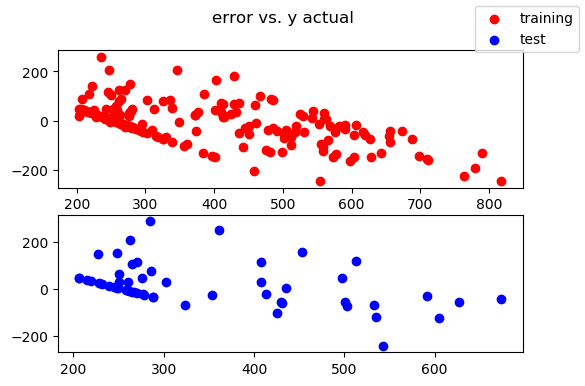

In [15]:
plot_model(X_train, X_test, y_train, y_test, model)

### Model 2 consider transform y to make y more normal distributed, resulted in more error

In [32]:
def tranform_log(x_list, b): #log(x-b)
    return np.log(list(x_list-b))

In [33]:
y_log = tranform_log(y_wl,y_wl.min()-10)

In [34]:
def inverse_log(transformed_x,b):
    return np.exp(transformed_x)+b

In [35]:
inverse_log(y_log, y_wl.min()-10)

array([254.75, 261.75, 263.  , 265.  , 275.  , 265.  , 278.  , 271.  ,
       271.  , 270.75, 220.  , 222.  , 242.  , 227.  , 241.  , 288.  ,
       251.  , 279.  , 265.  , 228.  , 258.  , 248.  , 236.  , 274.  ,
       277.  , 227.  , 222.  , 218.  , 310.25, 291.  , 240.  , 251.  ,
       263.  , 245.  , 302.  , 252.  , 283.  , 225.  , 316.  , 230.  ,
       442.  , 247.5 , 276.25, 294.75, 312.  , 251.  , 206.  , 209.  ,
       212.  , 245.  , 223.  , 278.  , 275.  , 356.25, 475.  , 578.  ,
       252.  , 241.  , 258.  , 372.5 , 270.25, 303.  , 228.  , 239.  ,
       245.  , 218.  , 227.  , 235.  , 278.75, 276.  , 293.75, 326.  ,
       330.  , 353.25, 432.25, 425.  , 372.  , 451.  , 251.  , 276.  ,
       227.  , 257.  , 265.  , 270.  , 215.  , 281.  , 238.  , 204.  ,
       219.  , 245.  , 217.  , 253.  , 231.75, 206.  , 278.  , 502.  ,
       413.  , 286.  , 336.  , 460.5 , 219.  , 413.  , 247.  , 349.  ,
       262.  , 257.5 , 274.25, 211.  , 278.  , 261.  , 243.  , 266.75,
      

(array([ 7.,  6., 15., 23., 55., 38., 19., 35., 50., 19.]),
 array([2.30258509, 2.71610175, 3.1296184 , 3.54313506, 3.95665172,
        4.37016837, 4.78368503, 5.19720168, 5.61071834, 6.02423499,
        6.43775165]),
 <a list of 10 Patch objects>)

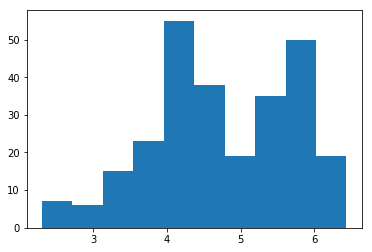

In [47]:
X_train, X_test, y_train, y_test=du.DataUtils.splitData(x_encode, y_log, ratio=0.2)
plt.hist(y_log.tolist())

In [37]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=50)

Train on 213 samples, validate on 54 samples
Epoch 1/50
213/213 [==============================] - 3s 12ms/step - loss: 62647.7686 - mean_absolute_error: 218.5887 - val_loss: 3425.5796 - val_mean_absolute_error: 57.6623
Epoch 2/50
213/213 [==============================] - 3s 15ms/step - loss: 1629.7965 - mean_absolute_error: 34.5866 - val_loss: 1.5119 - val_mean_absolute_error: 0.9973
Epoch 3/50
213/213 [==============================] - 3s 15ms/step - loss: 119.5826 - mean_absolute_error: 10.8718 - val_loss: 4.1511 - val_mean_absolute_error: 1.8264
Epoch 4/50
213/213 [==============================] - 3s 13ms/step - loss: 87.6670 - mean_absolute_error: 9.2760 - val_loss: 1.2819 - val_mean_absolute_error: 0.9058
Epoch 5/50
213/213 [==============================] - 3s 13ms/step - loss: 47.1415 - mean_absolute_error: 6.7406 - val_loss: 9.1791 - val_mean_absolute_error: 2.8942
Epoch 6/50
213/213 [==============================] - 3s 14ms/step - loss: 21.6300 - mean_absolute_error: 4.514

Epoch 50/50
213/213 [==============================] - 3s 12ms/step - loss: 1.0762 - mean_absolute_error: 0.8857 - val_loss: 22.0825 - val_mean_absolute_error: 4.6122


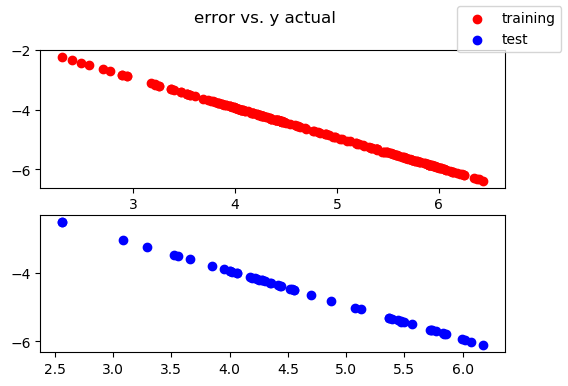

In [38]:
plot_model(X_train, X_test, y_train, y_test, model)

In [48]:
inverse_log(model.predict(X_train).reshape(1,-1), y_wl.min()-10)

array([[194.06293, 194.06416, 194.06416, 194.06299, 194.06416, 194.06647,
        194.06416, 194.06299, 194.06416, 194.06299, 194.06416, 194.06299,
        194.06252, 194.06416, 194.06416, 194.06416, 194.06416, 194.06416,
        194.06416, 194.06416, 194.06299, 194.06416, 194.03085, 194.06416,
        194.06416, 194.06416, 194.06299, 194.06416, 194.06416, 194.06416,
        194.06299, 194.06416, 194.06299, 194.06299, 194.06416, 194.06416,
        194.06416, 194.06299, 194.06299, 194.06299, 194.06416, 194.06416,
        194.06416, 194.06416, 194.06383, 194.05634, 194.06299, 194.06299,
        194.06383, 194.06299, 194.06299, 194.06299, 194.06299, 194.06416,
        194.06416, 194.06946, 194.06064, 194.06416, 194.06299, 194.06416,
        194.05634, 194.06416, 194.06416, 194.06416, 194.06416, 194.06299,
        194.06416, 194.06416, 194.06416, 194.06252, 194.06416, 194.06416,
        194.06416, 194.06299, 194.06416, 194.06416, 194.06299, 194.06416,
        194.06416, 194.06416, 194.0638

Text(0.5, 0.98, 'error vs. y actual')

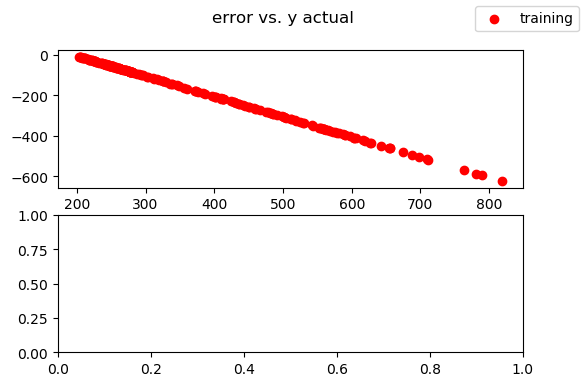

In [49]:
fig, axes = plt.subplots(2)
fig.dpi=100
axes[0].scatter(inverse_log(y_train, y_wl.min()-10), inverse_log(model.predict(X_train).reshape(1,-1), y_wl.min()-10)-inverse_log(y_train, y_wl.min()-10), color = 'r',label='training')

fig.legend()
plt.suptitle("error vs. y actual" )

A lot more error at higher wavelength

### Try under sample the 200-400nm region to make the y more uniform

In [9]:
Y_category = (y_wl - 200) // 20

In [11]:
cls, counts = np.unique(Y_category, return_counts=True)
cls_counts = dict(zip(cls, counts))
print(cls_counts)

{0.0: 18, 1.0: 23, 2.0: 40, 3.0: 44, 4.0: 14, 5.0: 7, 6.0: 8, 7.0: 4, 8.0: 6, 9.0: 3, 10.0: 12, 11.0: 10, 12.0: 7, 13.0: 4, 14.0: 7, 15.0: 10, 16.0: 5, 17.0: 10, 18.0: 6, 19.0: 6, 20.0: 6, 21.0: 3, 22.0: 4, 23.0: 2, 24.0: 2, 25.0: 2, 28.0: 1, 29.0: 2, 30.0: 1}


#### To each category, keep less than 20 counts per category

In [40]:
data_cat=np.column_stack((x_str,y_wl,Y_category))

In [61]:
def subsampling(dataset, cls_max, cls_dict):
    out = []
    for row in dataset:
        cls = row[2]
        rInt = np.random.randint(0, cls_dict[cls])
        if rInt <= cls_max:
            out.append(row)
    return np.array(out)

subsampled = subsampling(data_cat, 10, cls_counts)

In [62]:
subsampled[:,1].shape

(189,)

In [63]:
x_encode=du.DataUtils.numeric_encoding(subsampled[:,0],uniform_length=maxlen+5,word_map=wordmap)

In [64]:
y_sub = subsampled[:,1]

(array([41., 29., 18., 25., 21., 23., 18.,  7.,  3.,  4.]),
 array([203. , 264.5, 326. , 387.5, 449. , 510.5, 572. , 633.5, 695. ,
        756.5, 818. ]),
 <a list of 10 Patch objects>)

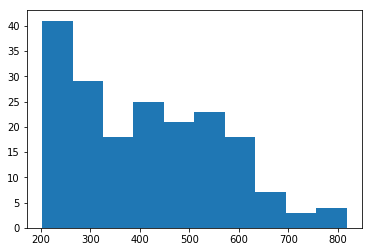

In [67]:
X_train, X_test, y_train, y_test=du.DataUtils.splitData(x_encode, y_sub, ratio=0.15)
plt.hist(y_sub.tolist())

In [70]:
hidden_size = 50
model = Sequential()
model.add(Embedding(len(wordmap), hidden_size, input_length=maxlen+5))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(hidden_size, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_error'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 279, 50)           2250      
_________________________________________________________________
lstm_4 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 279, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 279, 50)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 279, 50)           2550      
_________________________________________________________________
flatten_2 (Flatten)          (None, 13950)             0         
__________

In [71]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=50)

Train on 160 samples, validate on 29 samples
Epoch 1/50
160/160 [==============================] - 4s 26ms/step - loss: 198562.2719 - mean_absolute_error: 419.9061 - val_loss: 164067.7656 - val_mean_absolute_error: 379.2515
Epoch 2/50
160/160 [==============================] - 2s 11ms/step - loss: 193748.8687 - mean_absolute_error: 413.9373 - val_loss: 150534.7188 - val_mean_absolute_error: 360.8287
Epoch 3/50
160/160 [==============================] - 2s 11ms/step - loss: 157656.6547 - mean_absolute_error: 366.3126 - val_loss: 92568.8984 - val_mean_absolute_error: 268.7489
Epoch 4/50
160/160 [==============================] - 2s 11ms/step - loss: 83147.7500 - mean_absolute_error: 246.3115 - val_loss: 35154.0078 - val_mean_absolute_error: 133.5898
Epoch 5/50
160/160 [==============================] - 2s 11ms/step - loss: 30540.1109 - mean_absolute_error: 139.6379 - val_loss: 26367.6211 - val_mean_absolute_error: 143.5896
Epoch 6/50
160/160 [==============================] - 2s 11ms/ste

Epoch 47/50
160/160 [==============================] - 2s 14ms/step - loss: 22313.2809 - mean_absolute_error: 126.6933 - val_loss: 21134.8574 - val_mean_absolute_error: 130.9054
Epoch 48/50
160/160 [==============================] - 2s 14ms/step - loss: 22432.8074 - mean_absolute_error: 126.7174 - val_loss: 20603.0156 - val_mean_absolute_error: 129.8223
Epoch 49/50
160/160 [==============================] - 2s 14ms/step - loss: 22217.7729 - mean_absolute_error: 125.7395 - val_loss: 20892.5215 - val_mean_absolute_error: 130.4620
Epoch 50/50
160/160 [==============================] - 2s 14ms/step - loss: 22078.0854 - mean_absolute_error: 125.7653 - val_loss: 21381.2891 - val_mean_absolute_error: 131.6530
